# Dataset download

In [1]:
from xami_dataset.loader import XAMIDataset
from xami_dataset.xami_utils import dataset_utils

# Download the dataset from HuggingFace
xami_dataset = XAMIDataset(
    repo_id="iulia-elisa/XAMI-dataset", 
    dataset_name="xami_dataset", 
    dest_dir='./data_22')

xami_dataset.zip:   0%|          | 0.00/51.1M [00:00<?, ?B/s]

Dataset downloaded.
Dataset unzipped.
Train annotations file: ./data_22/xami_dataset/train/_annotations.coco.json
Valid annotations file: ./data_22/xami_dataset/valid/_annotations.coco.json


# Dataset info

In [2]:
from colorama import Fore, Style

splits = ['train', 'valid']

for annotations_file in [xami_dataset.train_annotations_path, xami_dataset.valid_annotations_path]:
    data = dataset_utils.get_data_from_json(annotations_file)
    _, cat_names, _ = dataset_utils.get_categories(data)
    print(annotations_file)
    print(f"{Fore.BLUE}Class categories in: {cat_names}{Style.RESET_ALL}")
    print(f"{Fore.BLUE}Number of annotations: {len(data['annotations'])}{Style.RESET_ALL}")
    print(f"{Fore.BLUE}Number of images in: {len(data['images'])}{Style.RESET_ALL}")

./data_22/xami_dataset/train/_annotations.coco.json
Class categories in: ['artefacts', 'central-ring', 'other', 'read-out-streak', 'smoke-ring', 'star-loop']
Number of annotations: 5298
Number of images in: 791
./data_22/xami_dataset/valid/_annotations.coco.json
Class categories in: ['artefacts', 'central-ring', 'other', 'read-out-streak', 'smoke-ring', 'star-loop']
Number of annotations: 1723
Number of images in: 264


In [3]:
categories_df = dataset_utils.get_category_table(
    xami_dataset.train_annotations_path, 
    xami_dataset.valid_annotations_path)
display(categories_df) 

Split,#Train (%),#Valid (%)
Category,,
central-ring,500.0 (9.438%),168.0 (9.75%)
other,32.0 (0.604%),9.0 (0.522%)
read-out-streak,2122.0 (40.053%),677.0 (39.292%)
smoke-ring,1267.0 (23.915%),402.0 (23.331%)
star-loop,1377.0 (25.991%),467.0 (27.104%)


We can also see how many images per filter we have.

In [4]:
filters_count = {'U': 0, 'V': 0, 'B': 0, 'W': 0, 'S': 0, 'M': 0, 'L': 0}
filters_df = dataset_utils.get_filters_table(
    xami_dataset.train_annotations_path, 
    xami_dataset.valid_annotations_path,
    filters_count)
display(filters_df)

,Observing Filter,Image Count,Annotation Count
0,U,193,1837
1,V,102,880
2,B,116,1259
3,W,3,11
4,S,63,226
5,M,175,681
6,L,403,2127


In [5]:
# the json file contains coordinates and exposure times for XMM-OM observations.
# every key begins with 13 characters, which are the observation id and filter, followed by '.fits'

exposure_times = dataset_utils.exposure_per_filter(
    xami_dataset.dest_dir, 
    xami_dataset.dataset_name,
    filters_count, 
    obs_coords_file='./xami_dataset/obs_info_1024_all.json')
display(exposure_times)

{'train': {'U': 9636.439560439561,
  'V': 6573.854166666667,
  'B': 7225.481481481482,
  'W': 0,
  'S': 12253.176470588236,
  'M': 16922.196969696968,
  'L': 10837.369696969698},
 'valid': {'U': 9428.888888888889,
  'V': 8710.578947368422,
  'B': 3915.3846153846152,
  'W': 8300.0,
  'S': 16740.0,
  'M': 15238.37037037037,
  'L': 11945.203703703704}}

## Mask heatmap

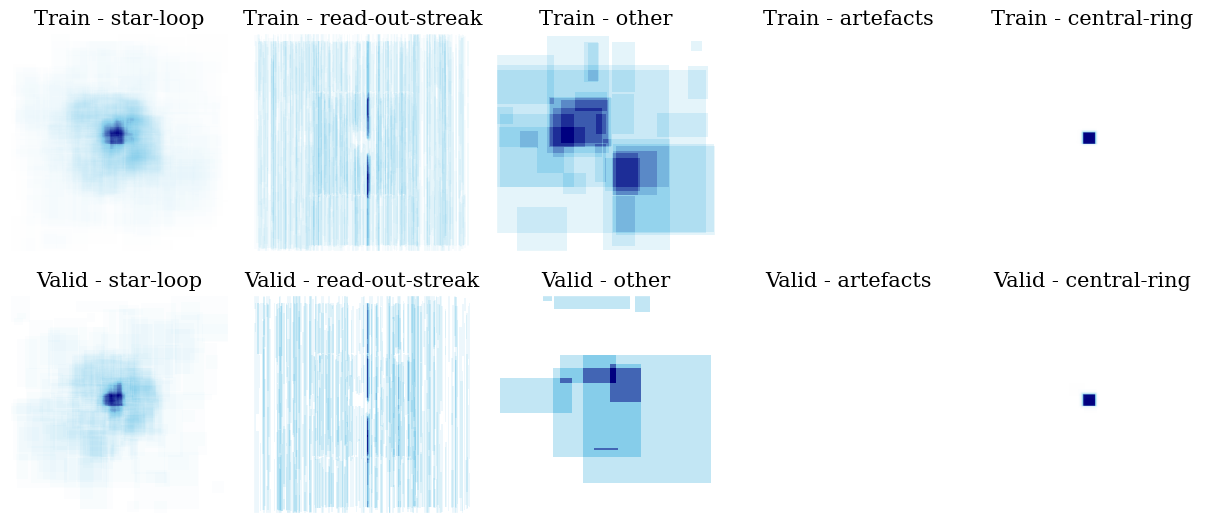

In [6]:
dataset_utils.generate_heatmap(
    xami_dataset.train_annotations_path,
    xami_dataset.valid_annotations_path,
    output_path='./artefact_distributions.png')

## Galactic coordinates plotting

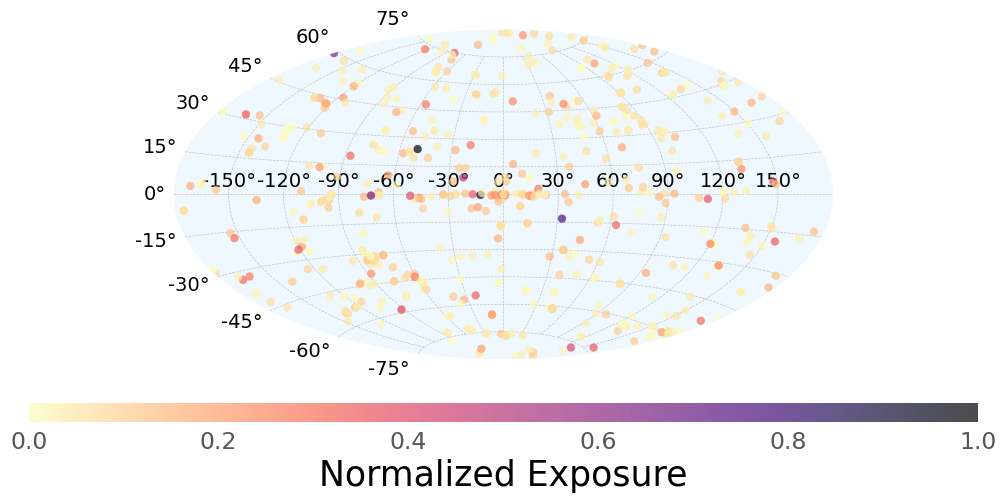

In [7]:
dataset_utils.generate_galactic_distribution_plot(
    xami_dataset.dest_dir, 
    xami_dataset.dataset_name,
    splits=['train', 'valid'], 
    obs_coords_file='./xami_dataset/obs_info_1024_all.json', 
    output_path='dataset_galactic_distribution.png')

# (Optional) Split the dataset using the multi-Stratified technique

In order to balance classes distributions across dataset splits, we use the multilabel Stratified K-Fold (**mskf**) technique. If you wish to generate different versions of dataset splits (e.g. with different *k*, different algorithm, etc...), please check the [stratified_kfold.ipynb](xami_dataset/notebooks/stratified_kfold.ipynb) notebook.